# Introduction

Taking a look at about 10000 League of Legends games from the Diamond I division or higher. Dataset includes most relevant data from the first ten minutes of the game and who ended up winning.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dtale
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\ProgramData\Anaconda3-1\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
games = pd.read_csv("lol_diamond.csv")
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [3]:
data = dtale.show(games)

The dtale package revealed quite a few useful insights.

    - There is no missing data which is always surprising. In fact it's downright suspicious.
    - Kills and deaths are perfectly correlated both ways. As in Blue Deaths and Red Kills; and Blue Kills and
      Red Deaths.
        - There aren't any deaths that occurred as a result of an error or a death to deprive the enemy team.
    - There are about 500-1000 entries where the blue team placed 100+ wards and a few where it was 200+. That
      seems odd given that this data is from the first 10 minutes of gametime. High level players do use more
      wards but 200+ in 10 minutes is hard if possible at all.

Visual confirmation of the matchup between kills and deaths. Assists are about all the variation there is on KDA.

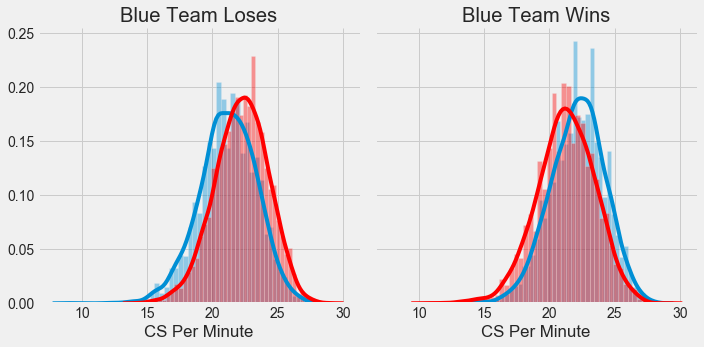

In [5]:
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")
graph = sns.FacetGrid(games, col = "blueWins", height = 5)
graph.map(sns.distplot, "blueCSPerMin")
graph.map(sns.distplot, "redCSPerMin", color = 'red')
graph.axes[0, 0].set_xlabel("CS Per Minute")
graph.axes[0, 1].set_xlabel("CS Per Minute")
graph.axes[0, 0].set_title("Blue Team Loses")
graph.axes[0, 1].set_title("Blue Team Wins")
graph

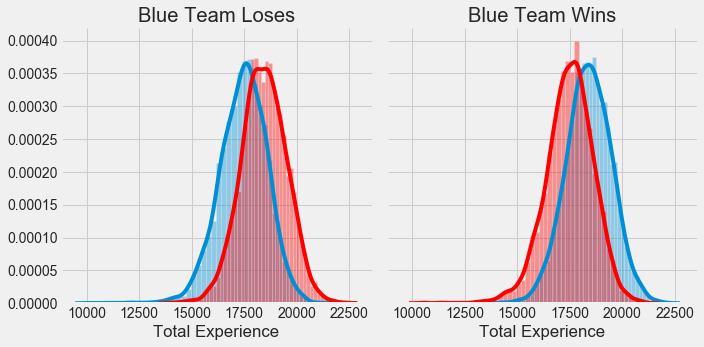

In [6]:
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")
graph = sns.FacetGrid(games, col = "blueWins", height = 5)
graph.map(sns.distplot, "blueTotalExperience")
graph.map(sns.distplot, "redTotalExperience", color = 'red')
graph.axes[0, 0].set_xlabel("Total Experience")
graph.axes[0, 1].set_xlabel("Total Experience")
graph.axes[0, 0].set_title("Blue Team Loses")
graph.axes[0, 1].set_title("Blue Team Wins")
graph

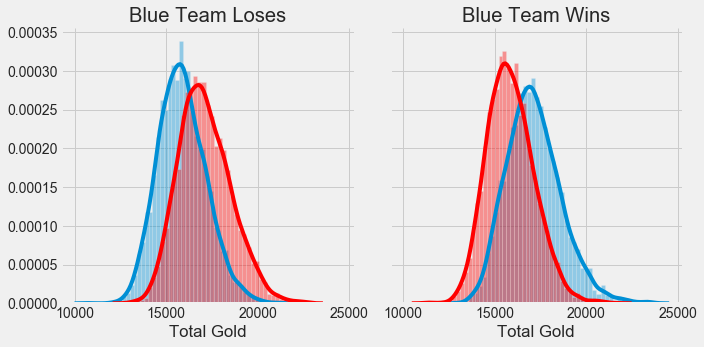

In [7]:
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")
graph = sns.FacetGrid(games, col = "blueWins", height = 5)
graph.map(sns.distplot, "blueTotalGold")
graph.map(sns.distplot, "redTotalGold", color = 'red')
graph.axes[0, 0].set_xlabel("Total Gold")
graph.axes[0, 1].set_xlabel("Total Gold")
graph.axes[0, 0].set_title("Blue Team Loses")
graph.axes[0, 1].set_title("Blue Team Wins")
graph

As should be no surprise, at this level the difference between the winning and losing team are minor. Thankfully, the CS, Exp, and Gold gaps are clear enough to visualize.

There's no particular reason to look at measures like number of dragons because there's not a lot of opportunities to get those within the first 10 minutes of a game.
Those are maybe better served to being predictive variables for a prediction model.
